## Downloading Data && preproeccessing

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4

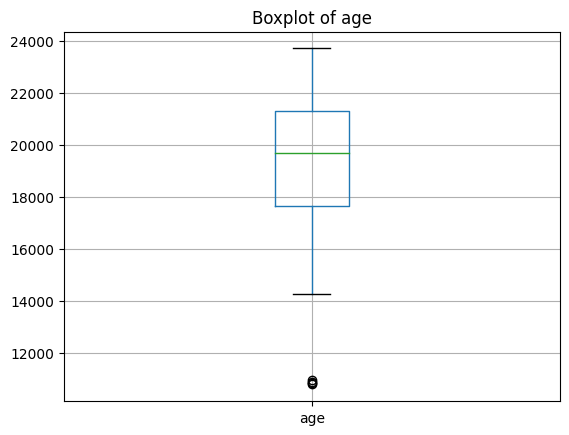

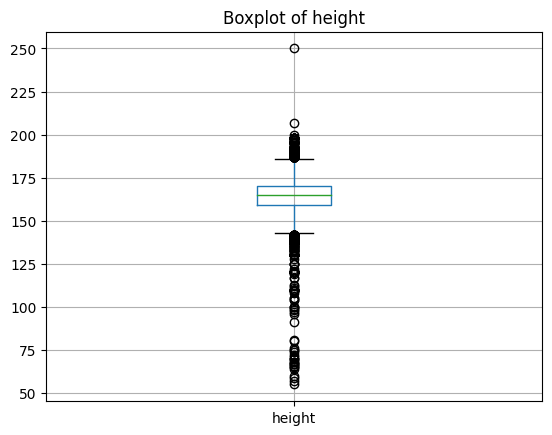

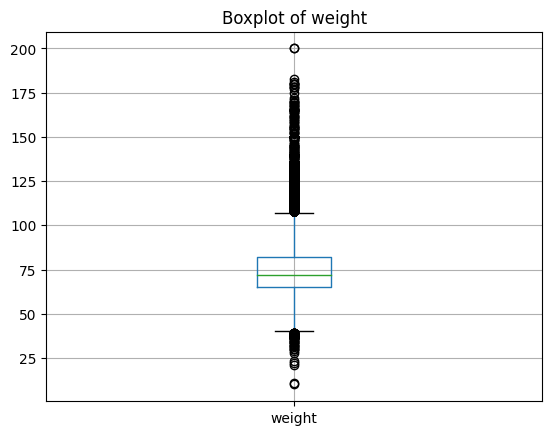

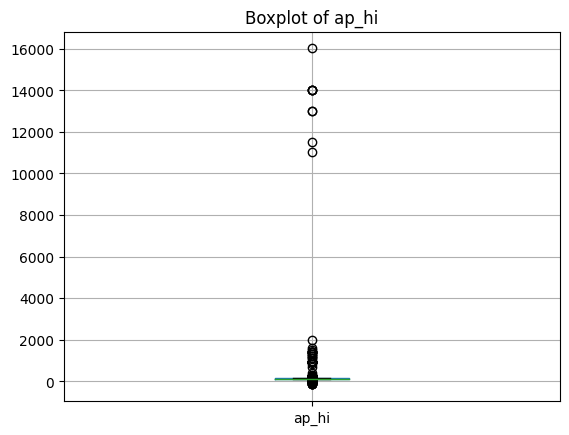

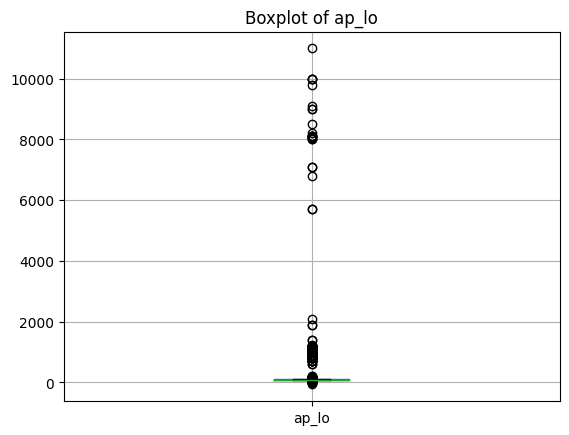

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame

data = pd.read_csv('cardio_train.csv',delimiter =";")
print(data.head())
print(data.info())
print(data.describe())

# data = data.head(10000)
# discared un needed columns
data.drop(columns=['id'], inplace=True)

# Step 4: Check for outlier
numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
for feature in numerical_features:
    # Visualize distribution using box plot
    data.boxplot(column=feature)
    plt.title(f'Boxplot of {feature}')
    plt.show()
# removing the outliers existing in huge amount in tow features 'ap_hi', 'ap_lo'
#  hi_percentile = 99
#  lo_percentile = 1
# # # Calculate percentile values
# hi_threshold = np.percentile(data['ap_hi'], hi_percentile)
# lo_threshold = np.percentile(data['ap_lo'], lo_percentile)

# # Winsorize 'ap_hi' and 'ap_lo' features
# data['ap_hi'] = data['ap_hi'].clip(upper=hi_threshold)
# data['ap_lo'] = data['ap_lo'].clip(lower=lo_threshold)

target_column = data['cardio']
label_encoder = LabelEncoder()
# enceode target data into nubering  data
y_encoded = label_encoder.fit_transform(target_column)
X = data.drop(columns=['cardio'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=0)
# # Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])
X_train[numerical_features] = X_train_scaled
X_test[numerical_features] = X_test_scaled






In [ ]:


class Node:
    def __init__(self, feature=None, value=None, results=None, true_branch=None, false_branch=None):
        self.feature = feature  # Feature to split on
        self.value = value      # Value of the feature to split on
        self.results = results  # Stores class labels if node is a leaf node
        self.true_branch = true_branch  # Branch for values that are True for the feature
        self.false_branch = false_branch

In [ ]:

import numpy as np
from collections import Counter

def entropy(y):
    """
    Compute the entropy of a target variable array.

    Parameters:
    - y (numpy array): Target variable array.

    Returns:
    - entropy (float): Entropy of the target variable array.
    """
    counts = np.bincount(y)
    probabilities = counts / len(y)
    entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    return entropy

def split_data(X, y, feature, value):
    """
    Split the feature and target variable arrays into two subsets based on a given feature and value.

    Parameters:
    - X (numpy array): Feature matrix.
    - y (numpy array): Target variable array.
    - feature (int): Index of the feature to split on.
    - value (float): Value of the feature to split on.

    Returns:
    - true_X, true_y, false_X, false_y (numpy arrays): Feature and target variable arrays split based on the specified feature and value.
    """
    true_indices = np.where(X[:, feature] <= value)[0]
    false_indices = np.where(X[:, feature] > value)[0]
    true_X, true_y = X[true_indices], y[true_indices]
    false_X, false_y = X[false_indices], y[false_indices]
    return true_X, true_y, false_X, false_y

def information_gain(true_y, false_y, current_entropy):
    """
    Compute the information gain achieved by splitting the data based on a given feature and value.

    Parameters:
    - true_y (numpy array): Target variable array for the true branch.
    - false_y (numpy array): Target variable array for the false branch.
    - current_entropy (float): Entropy of the parent node.

    Returns:
    - gain (float): Information gain achieved by splitting the data based on a given feature and value.
    """
    true_entropy = entropy(true_y)
    false_entropy = entropy(false_y)
    p_true = len(true_y) / (len(true_y) + len(false_y))
    p_false = len(false_y) / (len(true_y) + len(false_y))
    gain = current_entropy - (p_true * true_entropy + p_false * false_entropy)
    return gain

def most_common_label(y):
    """
    Determine the most common label in the target variable array.

    Parameters:
    - y (numpy array): Target variable array.

    Returns:
    - most_common_label (int): Most common label in the target variable array.
    """
    counter = Counter(y)
    most_common = counter.most_common(1)
    return most_common[0][0]

def build_tree(X, y):
    """
    Build a decision tree recursively using the ID3 algorithm.

    Parameters:
    - X (numpy array): Feature matrix.
    - y (numpy array): Target variable array.

    Returns:
    - tree (Node object): Root node of the decision tree.
    """
    if len(set(y)) == 1:
        return Node(results=y[0])

    current_entropy = entropy(y)
    best_gain = 0.0
    best_criteria = None
    best_sets = None

    n_features = X.shape[1]

    for feature_index in range(n_features):
        feature_values = np.unique(X[:, feature_index])

        for value in feature_values:
            true_X, true_y, false_X, false_y = split_data(X, y, feature_index, value)
            gain = information_gain(true_y, false_y, current_entropy)

            if gain > best_gain:
                best_gain = gain
                best_criteria = (feature_index, value)
                best_sets = (true_X, true_y, false_X, false_y)

    if best_gain > 0:
        true_branch = build_tree(best_sets[0], best_sets[1])
        false_branch = build_tree(best_sets[2], best_sets[3])
        return Node(feature=best_criteria[0], value=best_criteria[1],
                    true_branch=true_branch, false_branch=false_branch)
    else:
        return Node(results=most_common_label(y))

def predict(tree, sample):
    """
    Predict the class label of a sample using the decision tree.

    Parameters:
    - tree (Node object): Root node of the decision tree.
    - sample (numpy array): Feature vector of a single sample.

    Returns:
    - prediction (int): Predicted class label for the sample.
    """
    if tree.results is not None:
        return tree.results
    else:
        if sample[tree.feature] <= tree.value:
            return predict(tree.true_branch, sample)
        else:
            return predict(tree.false_branch, sample)


In [ ]:

# Build the decision tree
decision_tree = build_tree(X_train.values, y_train)

# Make predictions on the test set
predictions = [predict(decision_tree, sample) for sample in X_test.values]


# Print predictions
# print(predictions)



NameError: name 'build_tree' is not defined

In [ ]:
def accuracy_score(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    accuracy = correct / total
    return accuracy*100

In [ ]:
print(accuracy_score(y_test, predictions))

63.33571428571428


In [ ]:
 from id3 import Id3Estimator
 from id3 import export_graphviz


ImportError: attempted relative import with no known parent package

In [ ]:
estimator = Id3Estimator()
tree = estimator.fit(X_train.values,y_train )
predicted = estimator.predict(X_test)
accureacy = accuracy_score(y_test,predicted)



In [ ]:
print(accureacy)

72.40714285714286


In [ ]:
Student_data = pd.read_csv('ML_assignment_6.csv',delimiter =",")

target = Student_data['A']
label_encoder = LabelEncoder()
# enceode target data into nubering  data
y_enc = label_encoder.fit_transform(target)
x = Student_data.drop(columns=['A'])

# Split data into training and testing sets
s_X_train, s_X_test, s_y_train, s_y_test = train_test_split(
    x,y_enc , test_size=0.2, random_state=0)

In [ ]:
data

,Early registration,Finished homework,Senior,Likes Coffee,Liked The Last homework,A
0,1,1,0,0,1,1
1,1,1,1,0,1,1
2,0,0,1,0,0,0
3,0,1,1,0,1,0
4,0,1,1,0,0,1
5,0,0,1,1,1,1
6,1,0,0,0,1,0
7,0,1,0,1,1,1
8,0,0,1,0,1,1
9,1,0,0,0,0,0


In [ ]:
# Build the decision tree
Stu_decision_tree = build_tree(s_X_train.values, s_y_train)

# Make predictions on the test set
Stu_predictions = [predict(Stu_decision_tree, sample) for sample in s_X_test.values]


# Print predictions
print(Stu_predictions)
print(s_y_test)
print(accuracy_score(s_y_test,Stu_predictions))

[0, 0, 0]
[1 0 1]
33.33333333333333


In [ ]:
tree = estimator.fit(s_X_train.values,s_y_train )
# tree = export_graphviz(estimator.tree_, 'tree.dot',X_train.feature_names)
predicted = estimator.predict(s_X_test)
accureacy = accuracy_score(s_y_test,predicted)

In [ ]:
print(accureacy)

33.33333333333333
